In [2]:
import numpy as np
import matplotlib.pyplot as plt

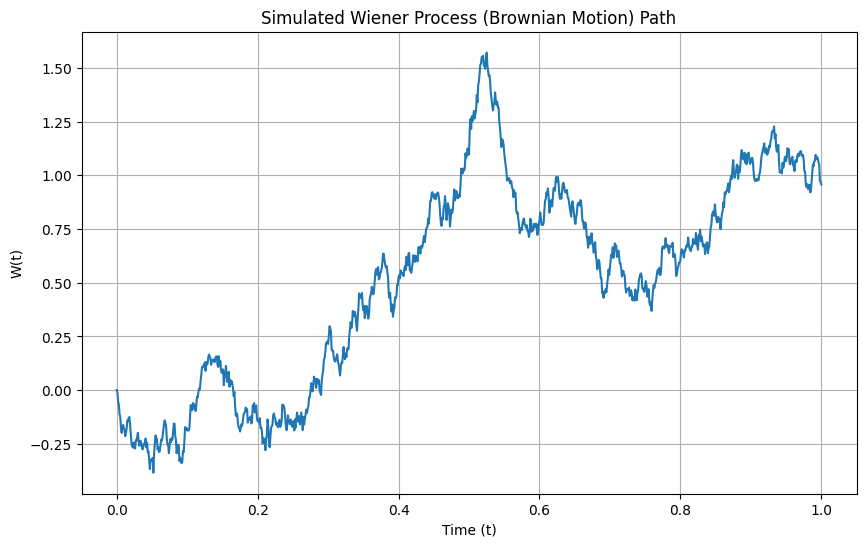

First 5 time points and W values:
t=0.0000, W=0.000000
t=0.0010, W=-0.013410
t=0.0020, W=-0.052217
t=0.0030, W=-0.069403
t=0.0040, W=-0.112724

Last 5 time points and W values:
t=0.9960, W=1.061449
t=0.9970, W=1.053050
t=0.9980, W=0.974534
t=0.9990, W=0.970291
t=1.0000, W=0.958298


In [6]:
# Question 1
# Function to simulate a single path of a one-dimensional Wiener process
def simulate_wiener_process(T, N):
    """
    Simulate a single path of a Wiener process (standard Brownian motion) over [0, T].
    
    Parameters:
    T : float
        Total time of the simulation.
    N : int
        Number of time steps.
        
    Returns:
    t : numpy array (shape (N+1,))
        Time points from 0 to T.
    W : numpy array (shape (N+1,))
        The simulated Wiener process path. W[0] = 0, and for i>=1, W[i] = W[i-1] + dW[i],
        where dW[i] is a normal random variable with mean 0 and variance dt = T/N.
    """
    dt = T / N   # Time step size
    t = np.linspace(0, T, N+1)  # Time points: 0, dt, 2dt, ..., T
    # Generate the increments: dW ~ normal(0, sqrt(dt))
    dW = np.sqrt(dt) * np.random.randn(N)
    # Initialize the Wiener process array with zeros at time 0
    W = np.zeros(N+1)
    # Compute the cumulative sum of the increments to form the path
    W[1:] = np.cumsum(dW)
    return t, W

# Set parameters
T = 1.0   # Total time
N = 1000  # Number of steps

# Simulate a single path
t, W = simulate_wiener_process(T, N)

# Plot the simulated path
plt.figure(figsize=(10, 6))
plt.plot(t, W)
plt.title('Simulated Wiener Process (Brownian Motion) Path')
plt.xlabel('Time (t)')
plt.ylabel('W(t)')
plt.grid(True)
plt.show()

# Output the full simulated path (the first 5 and last 5 points for inspection)
print("First 5 time points and W values:")
for i in range(5):
    print(f"t={t[i]:.4f}, W={W[i]:.6f}")

print("\nLast 5 time points and W values:")
for i in range(-5,0):
    print(f"t={t[i]:.4f}, W={W[i]:.6f}")


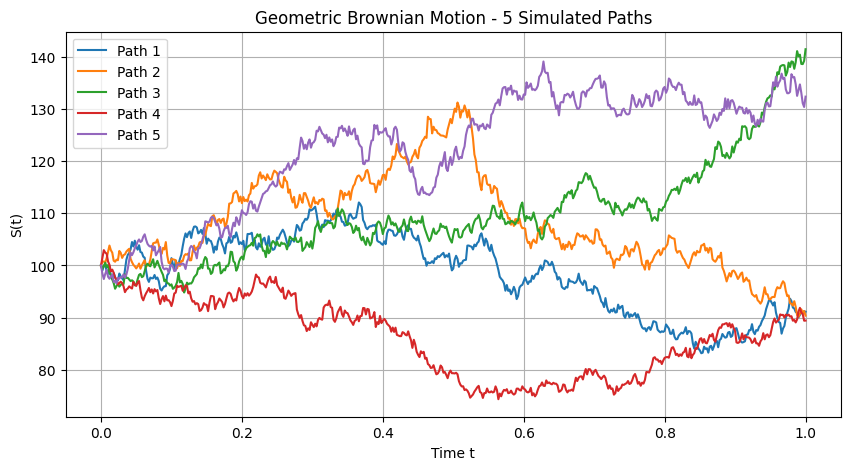

In [ ]:
# Question 2
# Parameters
T = 1.0               # total time
N = 500               # number of steps
dt = T / N            # time step
t = np.linspace(0, T, N+1)  # time grid

S0 = 100              # initial value
alpha = 0.1           # drift
sigma = 0.2           # volatility
num_paths = 5         # number of GBM paths

# Seed for reproducibility
np.random.seed(123)

# Simulate GBM paths
paths = np.zeros((num_paths, N+1))

for i in range(num_paths):
    W = np.zeros(N+1)
    dW = np.random.normal(0, np.sqrt(dt), size=N)
    W[1:] = np.cumsum(dW)

    exponent = sigma * W + (alpha - 0.5 * sigma**2) * t
    paths[i] = S0 * np.exp(exponent)

# Plotting
plt.figure(figsize=(10, 5))
for i in range(num_paths):
    plt.plot(t, paths[i], label=f'Path {i+1}')
plt.title('Geometric Brownian Motion - 5 Simulated Paths')
plt.xlabel('Time t')
plt.ylabel('S(t)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Question 3
# Parameters
s = 0.3
t = 0.7
N = 10000  # number of simulations

# Generate Brownian motion samples at s and t
np.random.seed(1)
W_s = np.random.normal(0, np.sqrt(s), size=N)
W_t = W_s + np.random.normal(0, np.sqrt(t - s), size=N)  # use independent increment

# Estimate E[W_s * W_t]
expected_value = np.mean(W_s * W_t)

print(f"Estimated E[W_s * W_t] = {expected_value:.4f}")
print(f"Expected (theoretical) min(s, t) = {min(s, t)}")

Estimated E[W_s * W_t] = 0.3048
Expected (theoretical) min(s, t) = 0.3


In [ ]:
# Question 4
# Parameters
s = 0.3
t = 0.9
N = 10000  # number of simulations

# Simulate increments
np.random.seed(1)
W_s = np.random.normal(0, np.sqrt(s), size=N)
W_t = W_s + np.random.normal(0, np.sqrt(t - s), size=N)
increments = W_t - W_s

# Check mean and variance of W_t - W_s
mean_inc = np.mean(increments)
var_inc = np.var(increments)

print(f"Mean of W_t - W_s = {mean_inc:.4f} (expected: 0)")
print(f"Variance of W_t - W_s = {var_inc:.4f} (expected: {t - s})")

# Check independence of non-overlapping increments
# [0, s] and [s, t] intervals
inc1 = np.random.normal(0, np.sqrt(s), size=N)
inc2 = np.random.normal(0, np.sqrt(t - s), size=N)

correlation = np.corrcoef(inc1, inc2)[0, 1]
print(f"Correlation between non-overlapping increments = {correlation:.4f} (expected: 0)")

Mean of W_t - W_s = 0.0073 (expected: 0)
Variance of W_t - W_s = 0.6014 (expected: 0.6000000000000001)
Correlation between non-overlapping increments = 0.0119 (expected: 0)


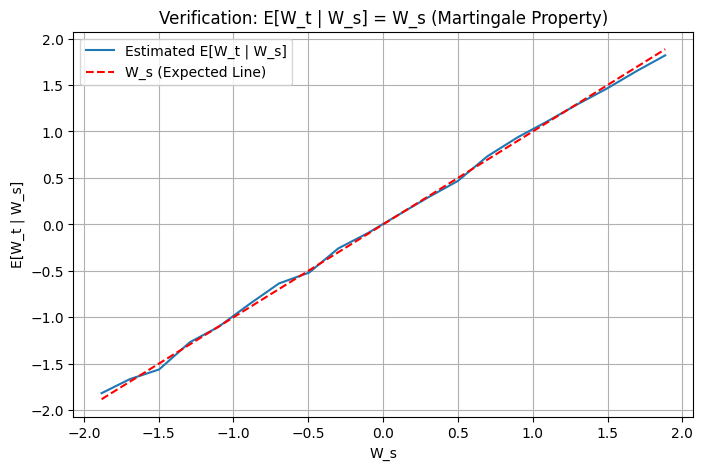

In [ ]:
# Question 5
# Parameters
s = 0.7
t = 1.2
N = 10000  # number of simulations

np.random.seed(42)
W_s = np.random.normal(0, np.sqrt(s), size=N)
W_t = W_s + np.random.normal(0, np.sqrt(t - s), size=N)

# Bin W_s values to compute the conditional expectation 
bins = np.linspace(-2, 2, 21)
digitized = np.digitize(W_s, bins)
conditional_expectation = []
bin_centers = []

for i in range(1, len(bins)):
    mask = digitized == i
    if np.any(mask):
        conditional_expectation.append(np.mean(W_t[mask]))
        bin_centers.append(np.mean(W_s[mask]))

# Plot conditional expectation vs W_s
plt.figure(figsize=(8, 5))
plt.plot(bin_centers, conditional_expectation, label='Estimated E[W_t | W_s]')
plt.plot(bin_centers, bin_centers, 'r--', label='W_s (Expected Line)')
plt.xlabel('W_s')
plt.ylabel('E[W_t | W_s]')
plt.title('Verification: E[W_t | W_s] = W_s (Martingale Property)')
plt.grid(True)
plt.legend()
plt.show()